In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
sns.set ()

In [2]:
df = pd.read_csv ('train.csv')

In [3]:
df.shape

(1458644, 11)

In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df.describe ()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Спостереження:  
    - стовпці pickup_datetime та dropoff_datetime зберігаються як обєкт, 
      який для кращого аналізу потрібно перетворити на datetime
    - числових стовпців із відсутніми даними немає
    - кількість пасажирів коливається від 1 до 9, 
      при цьому більшість людей становить 1 або 2
    

In [8]:
non_num_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'] 
print (df [non_num_cols] .count ())

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


In [9]:
df [non_num_cols].dtypes

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [10]:
df ['pickup_datetime'] = pd.to_datetime (df ['pickup_datetime']) 
df ['dropoff_datetime'] = pd.to_datetime (df ['dropoff_datetime'])

In [11]:
df [non_num_cols].dtypes

id                            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
store_and_fwd_flag            object
dtype: object

Проведемо аналіз та подивимося на розподіл змінних 

c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


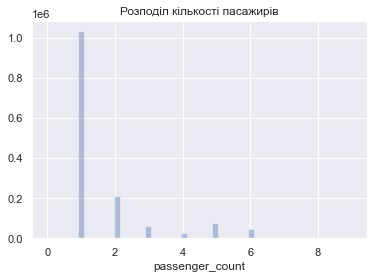

In [12]:
sns.distplot (df ['passenger_count'], kde = False) 
plt.title ('Розподіл кількості пасажирів') 
plt.show ()

Розподіл посадки та висадки пасажирів

In [13]:
df ['pickup_datetime'].nunique () 


1380222

In [14]:

df ['dropoff_datetime']. nunique ()

1380377

In [15]:
df ['pickup_datetime']. nunique () 
df ['dropoff_datetime']. nunique ()

1380377

In [16]:
df ['pickup_day'] = df ['pickup_datetime']. dt.day_name () 
df ['dropoff_day'] = df ['dropoff_datetime']. dt.day_name ()

In [17]:
df ['pickup_day']. value_counts ()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [18]:
df ['dropoff_day']. value_counts ()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

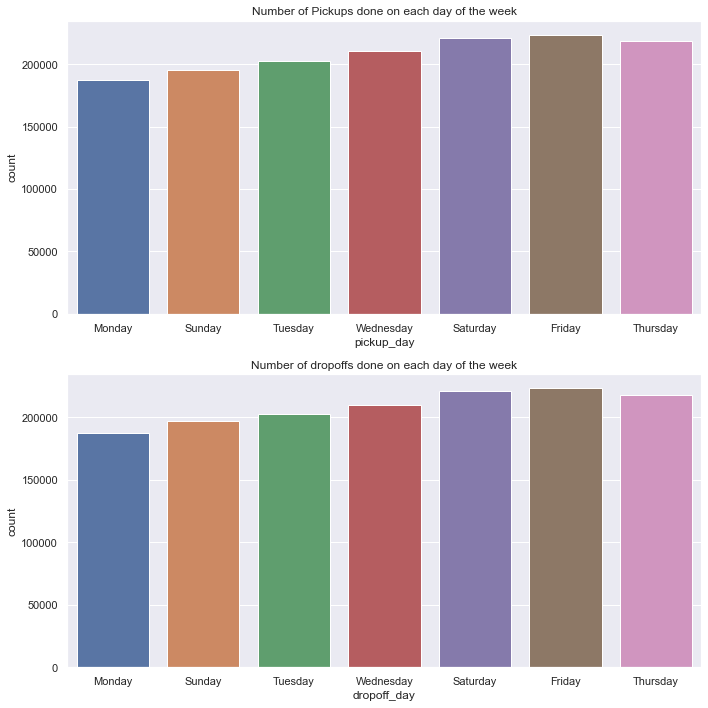

In [19]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()


In [20]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

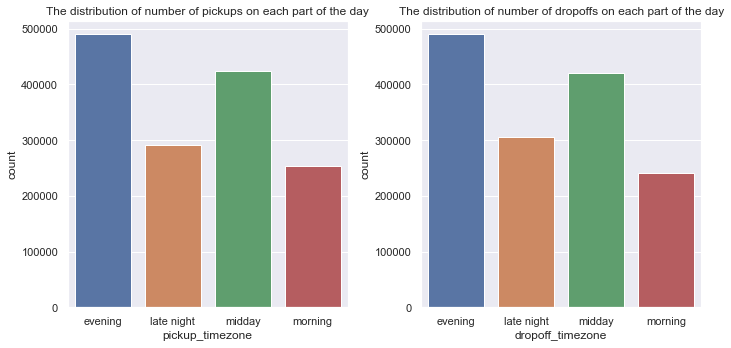

In [21]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

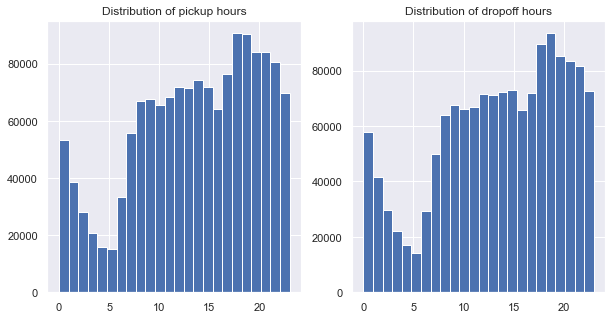

In [22]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Розподіл по прапорцю, чи зберігався запис про поїздку в пам'яті транспортного 
засобу

In [23]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
Розподіл по тривалості поїздки

c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

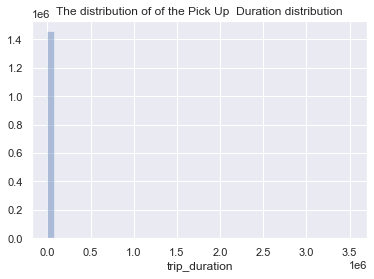

In [24]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

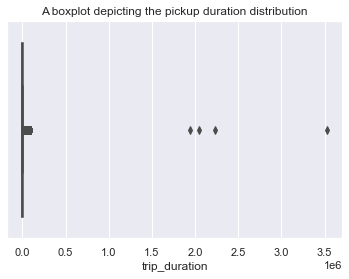

In [25]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [26]:
print( df['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


In [37]:
df.drop(df[df['trip_duration'] >= 1939736].index, inplace = True)

In [38]:
print( df['trip_duration'].nlargest(10))

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
753765     86379
91717      86378
1221666    86378
66346      86377
1138915    86377
Name: trip_duration, dtype: int64


In [140]:
bins = np.array ([0,1800,3600,5400,7200,90000]) 
df ['duration_time'] = pd.cut (df.trip_duration, bins, labels = ["<5", "5-10" , "10-15", "15-20", "> 20"])

Розподіл по постачальникам

<AxesSubplot:>

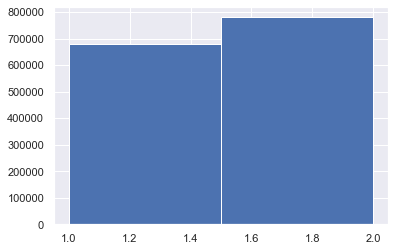

In [43]:
df ['vendor_id']. hist (bins = 2)

Зв'язок між тривалістю поїздки та днем тижня

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

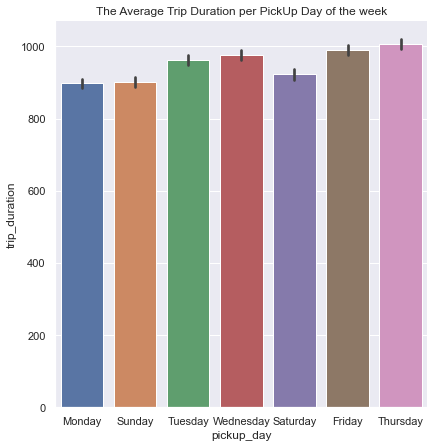

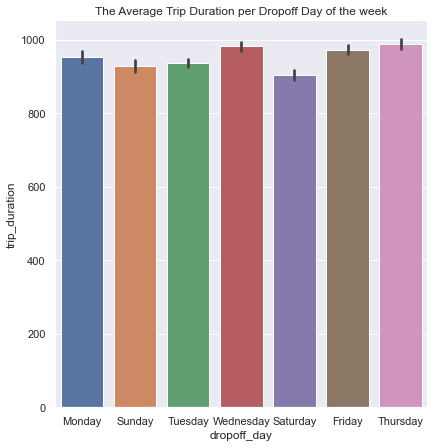

In [44]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

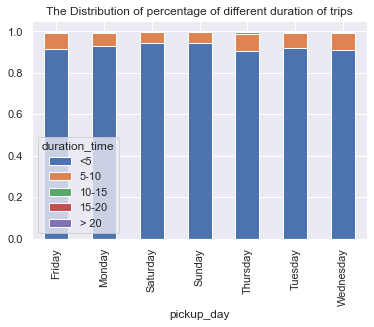

In [141]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

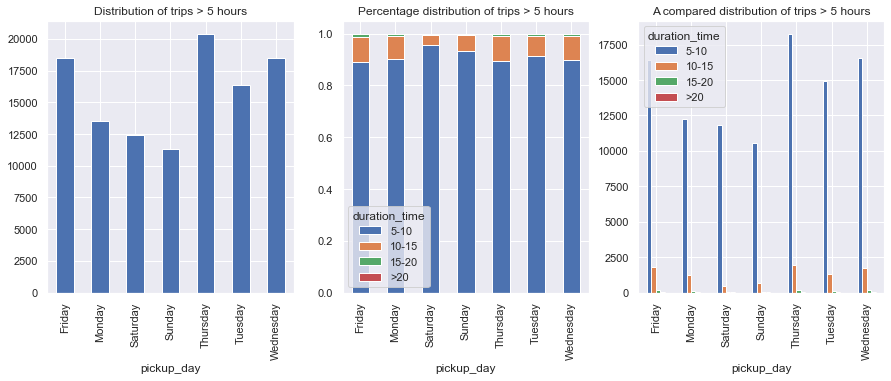

In [46]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

Зв'язок між тривалістю  поїздки та часом доби

c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


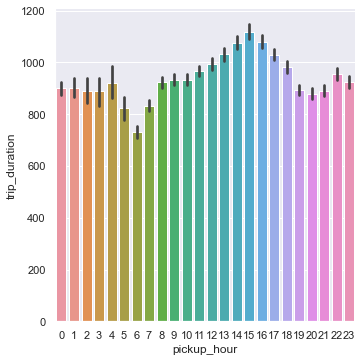

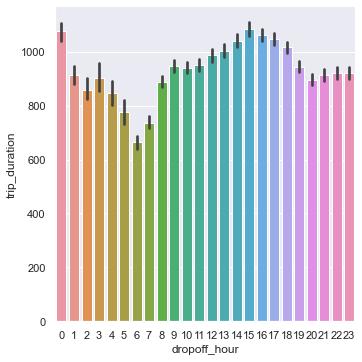

In [49]:
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df,ax=ax1)
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()



Зв'язок між кількістю пасажирів та тривалістю

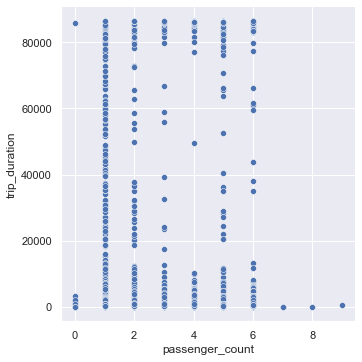

In [51]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

Зв'язок між ідентифікатором постачальника та тривалістю

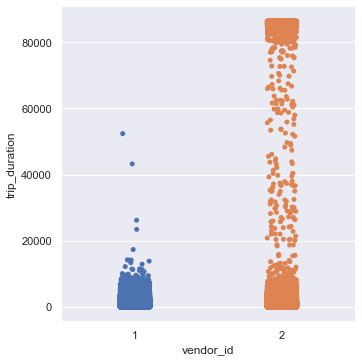

In [52]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

Зв'язок між прапором пересилання магазину та тривалістю

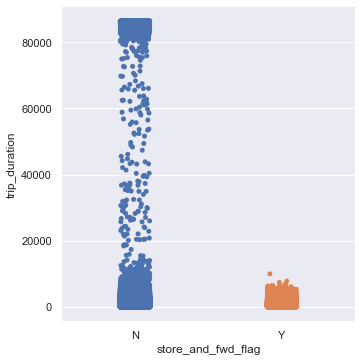

In [53]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

Зв'язок між географічним розташуванням та тривалістю

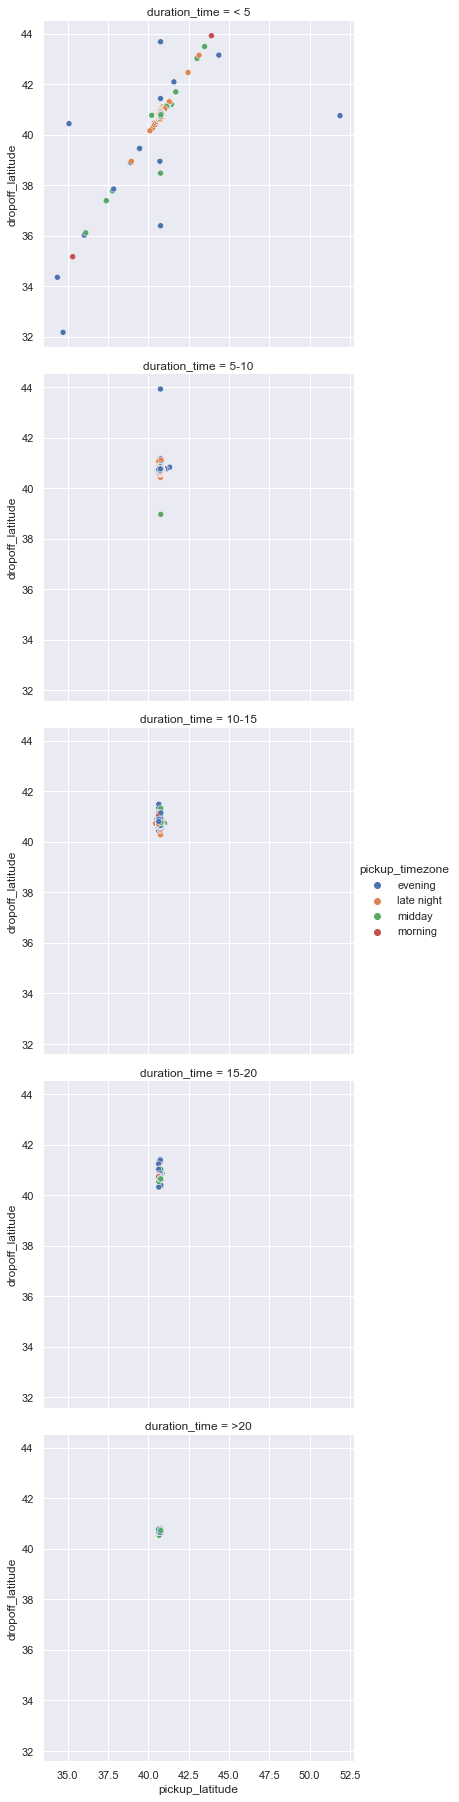

In [54]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

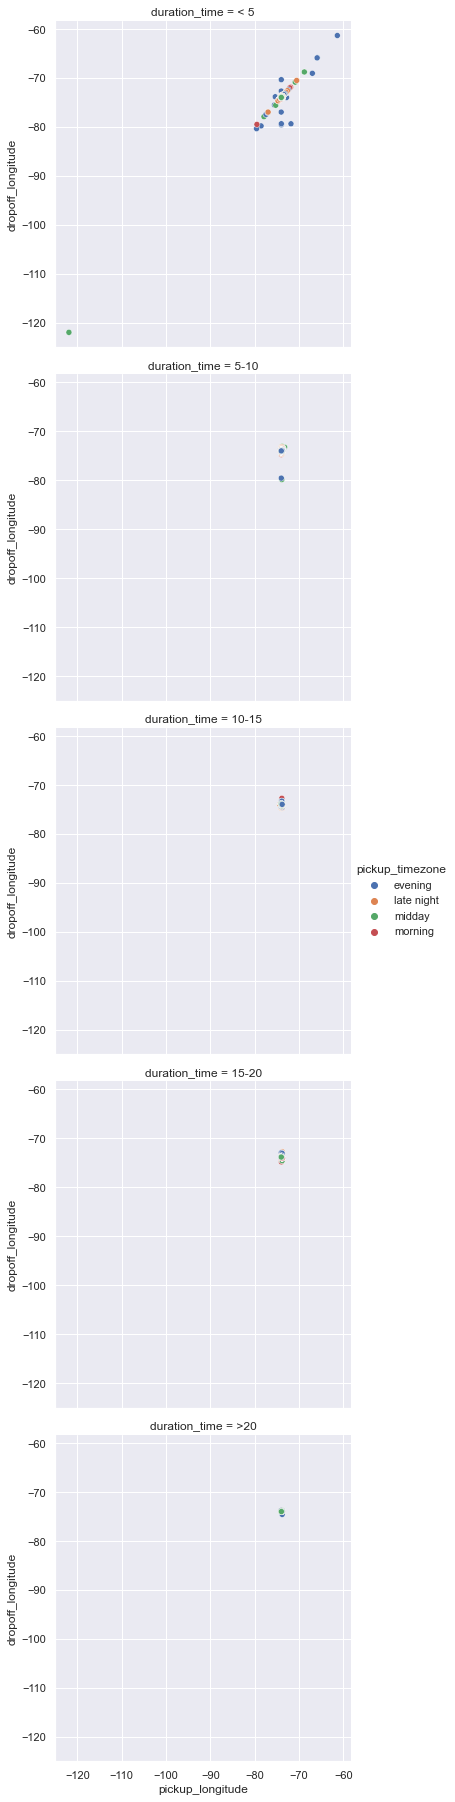

In [55]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

Розглянемо найбільші та найменші тривалості поїздки

In [56]:
print('The value of largest 5 trip duration values are as follows : \n {} '.format(df['trip_duration'].nlargest(5)))
print('The the number of rows with 1 as their trip duration values is {}'.format(len(df[df['trip_duration']==1 ])))

The value of largest 5 trip duration values are as follows : 
 1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
Name: trip_duration, dtype: int64 
The the number of rows with 1 as their trip duration values is 33


In [57]:
df['trip_duration_hour']=df['trip_duration']/3600 

Проаналізуємо кількість пасажирів

In [58]:
df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
8          1
9          1
Name: passenger_count, dtype: int64

In [59]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [60]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [61]:
df['pickup_month'].value_counts()

3    256179
4    251636
5    248474
2    238286
6    234310
1    229690
Name: pickup_month, dtype: int64

In [62]:
df['dropoff_month'].value_counts()

3    256123
4    251627
5    248542
2    238280
6    234237
1    229639
7       127
Name: dropoff_month, dtype: int64

In [63]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    127
Name: pickup_datetime, dtype: int64
30    127
Name: pickup_datetime, dtype: int64


Відстані поїздок, швидкість

In [66]:
from geopy.distance import great_circle

In [67]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [71]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

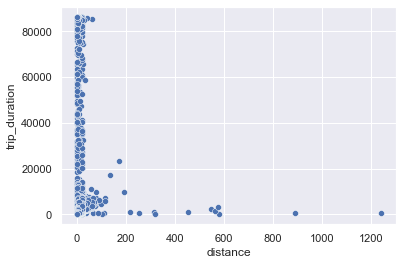

In [72]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

In [74]:
print('The no of rows with distance = 0 are {}'.format(len(df[df.distance==0])))

The no of rows with distance = 0 are 5887


In [75]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

c:\users\lina khomich\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed'>

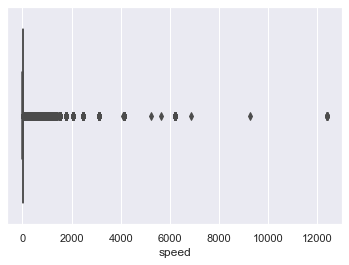

In [76]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

<AxesSubplot:xlabel='distance', ylabel='trip_duration_hour'>

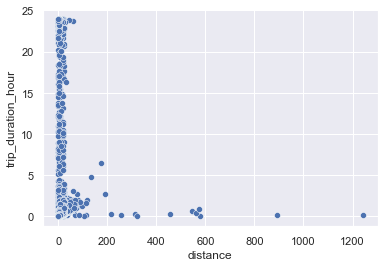

In [77]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

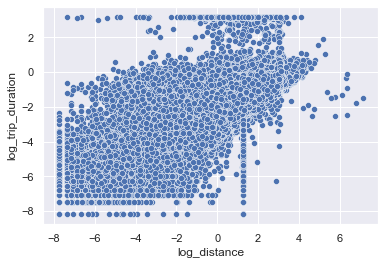

In [78]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [79]:
df=df[df.log_trip_duration<2]

In [80]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time',
       'trip_duration_hour', 'pickup_month', 'dropoff_month', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [81]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [82]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [83]:
corr =df.corr()

<AxesSubplot:>

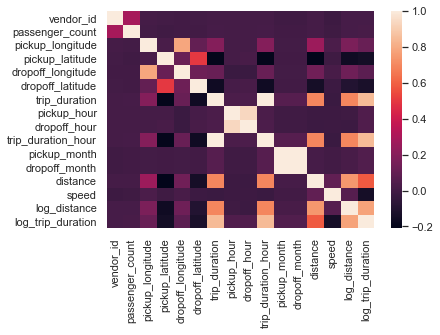

In [84]:
sns.heatmap(corr)

In [121]:
def read_data(TRAIN_DIR, TEST_DIR, nrows=None):
    data_train = pd.read_csv(TRAIN_DIR,
                             parse_dates=["pickup_datetime",
                                          "dropoff_datetime"],
                             nrows=nrows)
    data_test = pd.read_csv(TEST_DIR,
                            parse_dates=["pickup_datetime"],
                            nrows=nrows)
    data_train = data_train.drop(['dropoff_datetime'], axis=1)
    data_train.loc[:, 'store_and_fwd_flag'] = data_train['store_and_fwd_flag'].map({'Y': True,
                                                                                    'N': False})
    data_test.loc[:, 'store_and_fwd_flag'] = data_test['store_and_fwd_flag'].map({'Y': True,
                                                                                  'N': False})
    data_train = data_train[data_train.trip_duration < data_train.trip_duration.quantile(0.99)]

    xlim = [-74.03, -73.77]
    ylim = [40.63, 40.85]
    data_train = data_train[(data_train.pickup_longitude> xlim[0]) & (data_train.pickup_longitude < xlim[1])]
    data_train = data_train[(data_train.dropoff_longitude> xlim[0]) & (data_train.dropoff_longitude < xlim[1])]
    data_train = data_train[(data_train.pickup_latitude> ylim[0]) & (data_train.pickup_latitude < ylim[1])]
    data_train = data_train[(data_train.dropoff_latitude> ylim[0]) & (data_train.dropoff_latitude < ylim[1])]

    return (data_train, data_test)


In [122]:
def train_xgb(X_train, labels):
    Xtr, Xv, ytr, yv = train_test_split(X_train.values,
                                        labels,
                                        test_size=0.2,
                                        random_state=0)

    dtrain = xgb.DMatrix(Xtr, label=ytr)
    dvalid = xgb.DMatrix(Xv, label=yv)

    evals = [(dtrain, 'train'), (dvalid, 'valid')]

    params = {
        'min_child_weight': 1, 'eta': 0.166,
        'colsample_bytree': 0.4, 'max_depth': 9,
        'subsample': 1.0, 'lambda': 57.93,
        'booster': 'gbtree', 'gamma': 0.5,
        'silent': 1, 'eval_metric': 'rmse',
        'objective': 'reg:linear',
    }

    model = xgb.train(params=params, dtrain=dtrain, num_boost_round=227,
                      evals=evals, early_stopping_rounds=60, maximize=False,
                      verbose_eval=10)

    print('Modeling RMSE %.5f' % model.best_score)
    return model


In [123]:
def predict_xgb(model, X_test):
    dtest = xgb.DMatrix(X_test.values)
    ytest = model.predict(dtest)
    X_test['trip_duration'] = np.exp(ytest) - 1
    return X_test[['trip_duration']]

In [129]:
TRAIN_DIR = "train.csv"
TEST_DIR = "test.csv"

data_train, data_test = read_data(TRAIN_DIR, TEST_DIR)



,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,False,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,False,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,False,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,False,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,False,435


In [130]:
X_train = data_train.copy()
X_test = data_test.copy()

In [131]:
X_test.loc[:, 'pickup_year'] = X_test['pickup_datetime'].dt.year
X_train.loc[:, 'pickup_year'] = X_train['pickup_datetime'].dt.year

X_test.loc[:, 'pickup_month'] = X_test['pickup_datetime'].dt.month
X_train.loc[:, 'pickup_month'] = X_train['pickup_datetime'].dt.month

X_test.loc[:, 'pickup_day'] = X_test['pickup_datetime'].dt.day
X_train.loc[:, 'pickup_day'] = X_train['pickup_datetime'].dt.day

X_test.loc[:, 'pickup_hour'] = X_test['pickup_datetime'].dt.hour
X_train.loc[:, 'pickup_hour'] = X_train['pickup_datetime'].dt.hour

X_test.loc[:, 'pickup_minute'] = X_test['pickup_datetime'].dt.minute
X_train.loc[:, 'pickup_minute'] = X_train['pickup_datetime'].dt.minute

X_test.loc[:, 'pickup_second'] = X_test['pickup_datetime'].dt.second
X_train.loc[:, 'pickup_second'] = X_train['pickup_datetime'].dt.second

In [132]:
X_test = X_test.drop(['pickup_datetime'], axis=1)
X_train = X_train.drop(['pickup_datetime'], axis=1)

In [133]:
X_train = X_train.set_index(['id'])
X_test = X_test.set_index(['id'])

In [134]:
labels = np.log(X_train['trip_duration'].values + 1)
X_train = X_train.drop(['trip_duration'], axis=1)

In [135]:
model = train_xgb(X_train, labels)

[15:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:5.00329	valid-rmse:5.00278
[10]	train-rmse:1.00900	valid-rmse:1.00977
[20]	train-rmse:0.56070	valid-rmse:0.56283
[30]	train-rmse:0.51182	valid-rmse:0.51499
[40]	train-rmse:0.50191	valid-rmse:0.50594
[50]	train-rmse:0.48317	valid-rmse:0.48795
[60]	train-rmse:0.47906	valid-rmse:0.48463
[70]	train-rmse:0.47182	valid-rmse:0.47807
[80]	train-rmse:0.45840	valid-rmse:0.46537
[90]	train-rmse:0.44836	valid-rmse:0.45594
[100]	tr

In [137]:
submission = predict_xgb(model, X_test)
submission.head(5)

,trip_duration
id,
id3004672,698.372009
id3505355,422.680756
id1217141,432.247070
id2150126,1070.894409
id1598245,413.538330


In [138]:
submission.to_csv('trip_duration_baseline.csv', index=True, index_label='id')